In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv("Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


$Box - plot$

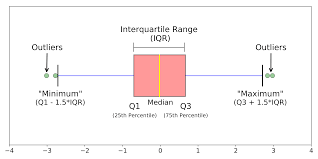

{'whiskers': [<matplotlib.lines.Line2D at 0x18b85148890>,
 'caps': [<matplotlib.lines.Line2D at 0x18b85184390>,
 'boxes': [<matplotlib.lines.Line2D at 0x18b8514aa50>],
 'medians': [<matplotlib.lines.Line2D at 0x18b85176cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18b85303d50>],
 'means': []}

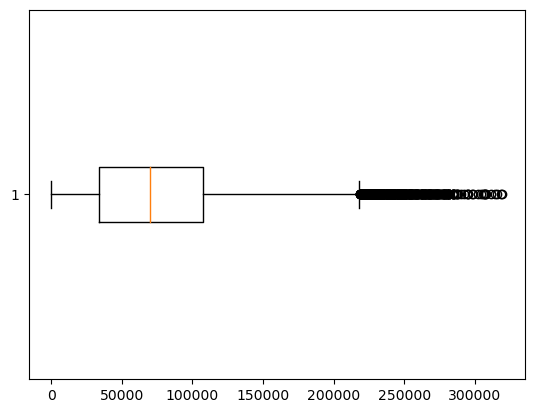

In [7]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
#plt.title("Box Plot")
#plt.show()

- Removal of outliers
- impute the outliers with median value
    - because median is not impact by outliers
- Cap the outliers with Q3, which are haveing more then Q3
- Cap the outliers with Q1, which are haveing less then Q1


**Find the outliers**

- Q3+1.5*IQR> and Q1-1.5*IQR

- Step-1: Calculate Q1 Q2 Q3
- Step-2: Calculate IQR=(Q3-Q1)
- Step-3: UB=Q3+1.5*IQR
- Step-4: LB=Q1-1.5*IQR
- Step-5: con1=col>UB
- Step-6: con2=col<LB
- Step-7: con1|con2
- Step-8: col[con1|con2]


In [13]:
q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
q2=round(np.percentile(visa_df['prevailing_wage'],50),2)
q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=(q3-q1)
UB=q3+1.5*IQR
LB=q1-1.5*IQR
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
outliers=visa_df['prevailing_wage'][con1|con2]
outliers_data=outliers.values
len(outliers_data)

427

In [17]:
def outliers():
    q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
    q2=round(np.percentile(visa_df['prevailing_wage'],50),2)
    q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
    IQR=(q3-q1)
    UB=q3+1.5*IQR
    LB=q1-1.5*IQR
    con1=visa_df['prevailing_wage']>UB
    con2=visa_df['prevailing_wage']<LB
    outliers=visa_df['prevailing_wage'][con1|con2]
    outliers_data=outliers.values
    return outliers_data
outliers_data=outliers()
outliers_data

array([220081.73, 225569.73, 247393.01, 269321.68, 219529.62, 232227.33,
       238691.32, 220448.17, 230750.48, 235339.91, 232680.65, 256261.78,
       262189.  , 250510.67, 218554.78, 256205.38, 221944.22, 229950.7 ,
       222628.84, 229819.69, 233641.72, 274019.43, 218982.83, 230984.28,
       223128.23, 246705.  , 240266.34, 226090.72, 231949.27, 254604.08,
       288318.91, 244457.48, 242146.48, 247545.23, 234139.17, 231834.72,
       222730.57, 239773.63, 220553.95, 237539.32, 266440.49, 277281.01,
       275627.59, 249291.12, 292106.59, 234012.11, 247009.24, 267726.09,
       222098.09, 280661.13, 277984.52, 262852.71, 263877.21, 230916.64,
       264760.64, 267868.56, 222221.67, 242406.32, 276894.08, 281832.93,
       221033.57, 258292.84, 223492.85, 245418.67, 250289.08, 271344.69,
       252825.11, 230843.7 , 253668.86, 245819.17, 239465.3 , 236316.36,
       225268.13, 228941.33, 306021.96, 228074.25, 270799.93, 221982.69,
       256903.7 , 242813.07, 253111.05, 268440.33, 

In [16]:
q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
q2=round(np.percentile(visa_df['prevailing_wage'],50),2)
q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=(q3-q1)
UB=q3+1.5*IQR
LB=q1-1.5*IQR
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
outliers_df=visa_df[con1|con2]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [21]:
len(outliers_data),len(visa_df),len(outliers_data)*100/len(visa_df)

(427, 25480, 1.6758241758241759)

Calculating the Percentage

In [33]:
# Case 1: Removal of Outliers
q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
q2=round(np.percentile(visa_df['prevailing_wage'],50),2)
q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=(q3-q1)
UB=q3+1.5*IQR
LB=q1-1.5*IQR
con1=visa_df['prevailing_wage']<UB
con2=visa_df['prevailing_wage']>LB
non_outliers_df=visa_df[con1&con2]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


(array([2992.,  871., 1005., 1170., 1242., 1434., 1385., 1443., 1444.,
        1445., 1457., 1335., 1268., 1217., 1088.,  978.,  807.,  645.,
         509.,  373.,  264.,  144.,  105.,  111.,  107.,   99.,   88.,
          79.,   65.,   64.,   58.,   53.,   33.,   33.,   29.,   19.,
           7.,    3.,    6.,    5.]),
 array([2.13670000e+00, 7.98234003e+03, 1.59625434e+04, 2.39427467e+04,
        3.19229500e+04, 3.99031534e+04, 4.78833567e+04, 5.58635600e+04,
        6.38437634e+04, 7.18239667e+04, 7.98041700e+04, 8.77843734e+04,
        9.57645767e+04, 1.03744780e+05, 1.11724983e+05, 1.19705187e+05,
        1.27685390e+05, 1.35665593e+05, 1.43645797e+05, 1.51626000e+05,
        1.59606203e+05, 1.67586407e+05, 1.75566610e+05, 1.83546813e+05,
        1.91527017e+05, 1.99507220e+05, 2.07487423e+05, 2.15467627e+05,
        2.23447830e+05, 2.31428033e+05, 2.39408237e+05, 2.47388440e+05,
        2.55368643e+05, 2.63348847e+05, 2.71329050e+05, 2.79309253e+05,
        2.87289457e+05, 2.9526

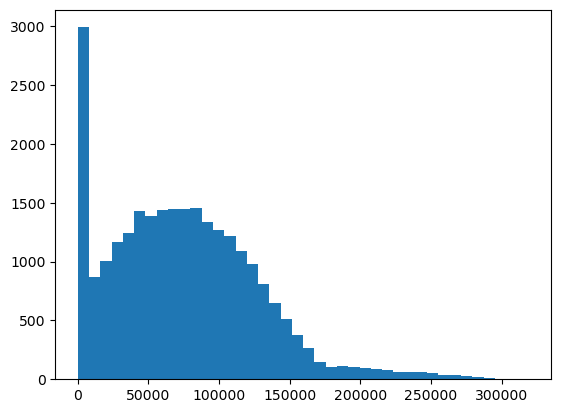

In [28]:
plt.hist(non_outliers_df['prevailing_wage'],bins=40)

{'whiskers': [<matplotlib.lines.Line2D at 0x18b8b5c03d0>,
 'caps': [<matplotlib.lines.Line2D at 0x18b8b5c1510>,
 'boxes': [<matplotlib.lines.Line2D at 0x18b8b5b7ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x18b8b5c2790>],
 'fliers': [<matplotlib.lines.Line2D at 0x18b8b4caf90>],
 'means': []}

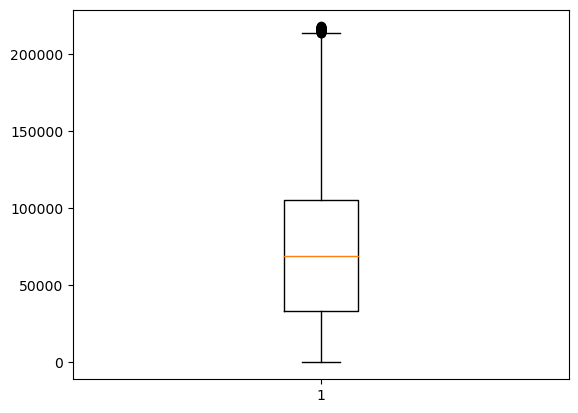

In [34]:
plt.boxplot(non_outliers_df['prevailing_wage'])


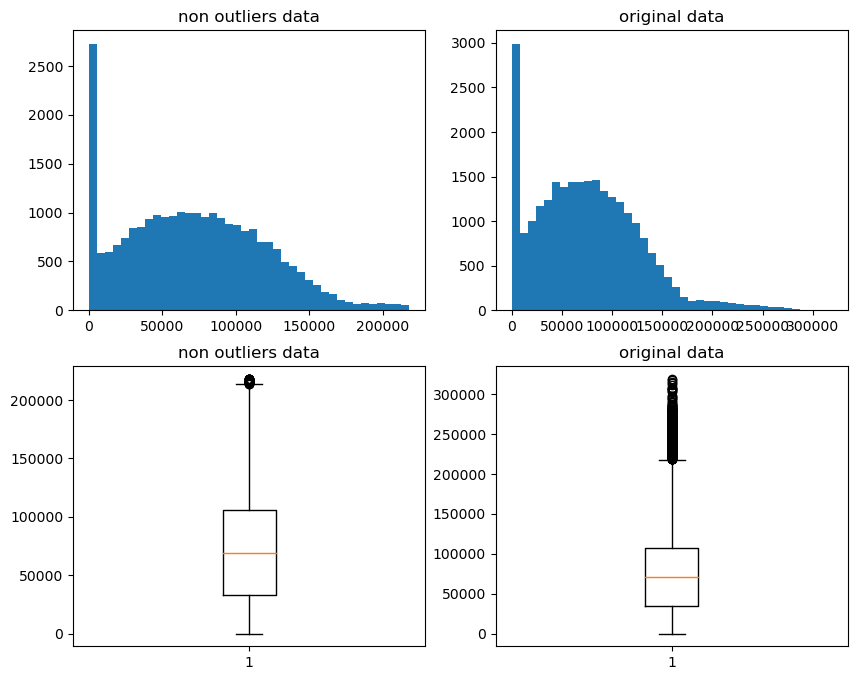

In [39]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.title("non outliers data")
plt.hist(non_outliers_df['prevailing_wage'],bins=40)

plt.subplot(2,2,2)
plt.title("original data")
plt.hist(visa_df['prevailing_wage'],bins=40)

plt.subplot(2,2,3)
plt.title("non outliers data")
plt.boxplot(non_outliers_df['prevailing_wage'])

plt.subplot(2,2,4)
plt.title("original data")
plt.boxplot(visa_df['prevailing_wage'])

plt.show()


In [54]:
#Case 2: Impute with Median
# We got pre_wage has 427 outliers
# we replace those 427 with median value of pre_wage

new_values=[]
for i in visa_df['prevailing_wage'].values:
    #print(i)
    if i>UB or i<LB:
        #print(i)
        new_values.append(427)
    else:
        new_values.append(i)
new_values


[592.2029,
 83425.65,
 122996.86,
 83434.03,
 149907.39,
 78252.14,
 53635.39,
 418.2298,
 74362.19,
 67514.76,
 83588.56,
 70813.09,
 28663.05,
 107196.03,
 427,
 74108.02,
 3706.79,
 16132.61,
 150441.13,
 79948.12,
 71128.98,
 137694.98,
 45642.39,
 90108.38,
 71286.04,
 99489.65,
 86332.95,
 103029.33,
 40925.86,
 189190.48,
 79594.12,
 135866.13,
 72077.57,
 81921.18,
 427,
 92421.92,
 2490.12,
 110817.26,
 50960.01,
 125336.9,
 39633.32,
 156326.33,
 43630.58,
 54614.42,
 28989.87,
 22924.91,
 61567.75,
 156251.17,
 86022.02,
 49565.37,
 66191.41,
 95623.2,
 115014.05,
 35018.04,
 230.8072,
 113799.64,
 85854.09,
 14174.04,
 47176.84,
 4949.28,
 67410.59,
 58791.58,
 103.2216,
 62591.57,
 102919.59,
 123468.56,
 82324.64,
 5319.49,
 153019.94,
 38059.89,
 230.327,
 61521.92,
 121316.5,
 122540.55,
 47170.76,
 330.3743,
 2927.34,
 107781.48,
 590.0203,
 194176.83,
 102073.81,
 113882.38,
 70778.82,
 84125.48,
 174014.59,
 34213.17,
 79813.05,
 113327.34,
 78893.64,
 140290.16,
 11